# Repetition Code (Bit Flip)

We start with some preliminary packages and functions, nothing fancy.

In [11]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister
# Loading your IBM Q account(s)
#IBMQ.save_account('1111fdc84fb52cd6a6ae57fc29ae3166444b265152e05e051e3c5051a3891f9c278fc82caee116aac2e46be7825435a4851613049483e87e281ff4cb6ee13158')


In [95]:
#secondary modules
import numpy as np
import matplotlib.pyplot as plt
import random

$ZZ$ stabilizer function

In [13]:
### ZZ (bit-flip) stabilizer 
def ZZ(circ, qubit_1, qubit_2, ancilla_qubit, classical_bit):
    #Z1Z2 Measurements
    circ.cx(qubit_1, ancilla_qubit)
    circ.cx(qubit_2, ancilla_qubit)
    circ.measure(ancilla_qubit, classical_bit)
    return

## Definition of the initial quantum circuits

We consider a repetiotion code which involves an odd number of qubits, $N$, to which we add a single ancilla qubit in order to perform stabilizing mesurements and classical bits to keep the results.
The main qubit ($q_0$ in the circuit) is the one we consider in our calculations, a.k.a the __logical__ qubit.
In order to simulate some errors a bit-flip ($X$) gate can be added with certain distribution (chosen by us, but always smaller than $0.5$) on every qubit.
Our reprtiotion code is able to detect and thus correct (using software) up to $(N-1)/2$ bit-flips.

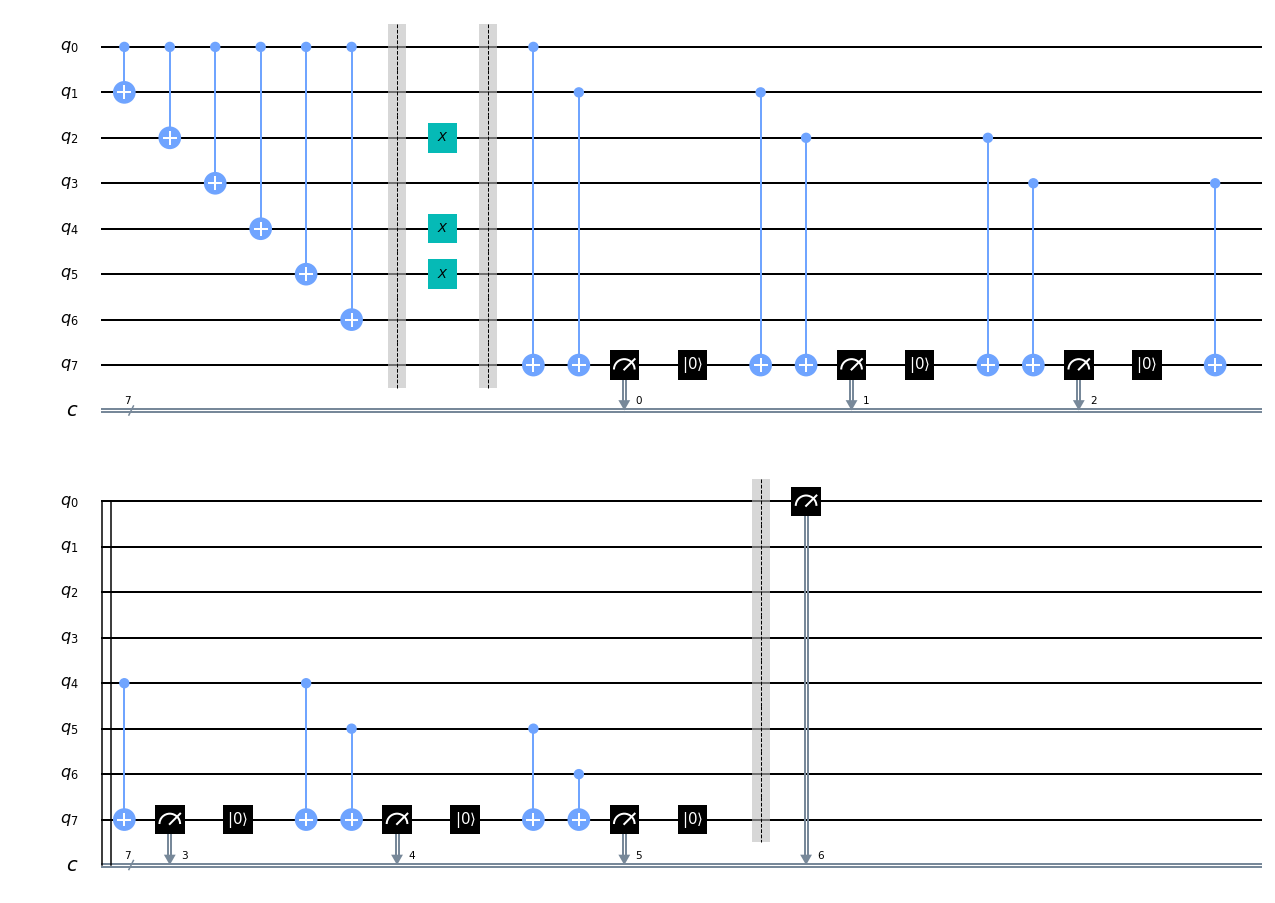

In [205]:
num_qubits = 7
num_clbits = num_qubits
ancilla_qubit = num_qubits #ancilla qubit number

#Here we define the quantum circuits with physical qubits, 1 syndrome qubit and cllasical qubits.
circ = QuantumCircuit(num_qubits+1 , num_clbits)

#Repetition Code
for i in range (1,num_qubits):
    circ.cx(0, i)
circ.barrier()

#Induced Error
for i in range(num_qubits-1):
    if random.choice(range(2))==0:
        circ.x(i)
    

circ.barrier()

#Bit-Flip Stabilizers
for i in range(num_qubits-1):
    ZZ(circ, i, i+1, ancilla_qubit, i)
    circ.reset(ancilla_qubit)
circ.barrier()    

#Error Correction

#Main Qubit Measurement on the last Classical bit
circ.measure(0,num_clbits-1)

circ.draw(output="mpl")

## Simulating on the quantum simulator

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


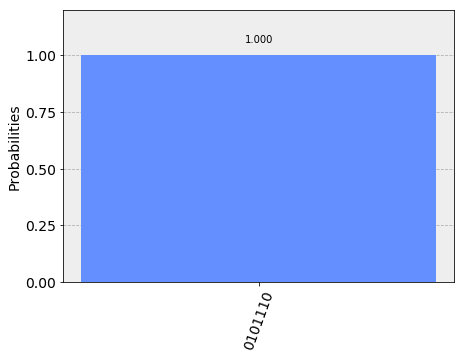

In [206]:
#IBMQ.save_account('1111fdc84fb52cd6a6ae57fc29ae3166444b265152e05e051e3c5051a3891f9c278fc82caee116aac2e46be7825435a4851613049483e87e281ff4cb6ee13158', overwrite=True)
IBMQ.load_account() # Load account from disk
from qiskit import visualization
%matplotlib inline

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
backend_sim = Aer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts  = result.get_counts(circ)


visualization.plot_histogram(counts)

## Software Error Correction

We assume that there is no error in the $ZZ$ measurement process or with the ancilla qubit.
The error-correction code is using a parity property and flips the logical qubit once for every time a $ZZ$ stabiliing measurement has yielded the value $1$, i.e. a pair of qubits that do not share the same bit value.

qubits 1 and 2 are different - flip!
qubits 2 and 3 are different - flip!
qubits 3 and 4 are different - flip!
qubits 5 and 6 are different - flip!


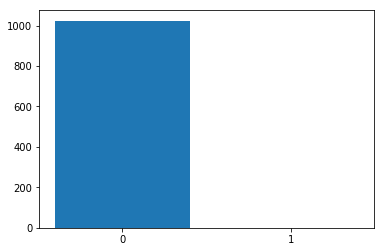

In [210]:
zero_counts = 0
one_counts = 0
for  count_index, count in enumerate(counts):
    logical_qubit_value = int(count[0])
#     print('a'+count) #string
#     print(counts[count]) #integer
    for qubit_index in range(1,num_clbits): 
        if count[-qubit_index] == '1': #Qubits are in different states
            print('qubits ' + str(qubit_index-1) + ' and ' + str(qubit_index) + ' are different - flip!')
            logical_qubit_value = (logical_qubit_value + 1) % 2 #Logical Qubit Bit Flip
        else:
            continue
    if logical_qubit_value == 0:
        zero_counts += counts[count]
    else:
        one_counts += counts[count]

plt.bar([0, 1], [zero_counts,one_counts])
plt.xticks(np.arange(2),('0', '1'))
plt.show()

Since we consider all gates to be errors counts in which $0$ was measured are considered a success, while a $1$ measurement is a failure.

## Running the code on a real machine

In [30]:
# Next, find the least-busy, but real, IBM device
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(hub='ibm-q')
real_device = least_busy(provider.backends(simulator=False))
print(real_device)

# And run the circuit on that device
job = execute(circ, backend=real_device, shots=1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

from qiskit import visualization
%matplotlib inline

#backend = provider.get_backend('ibmq_qasm_simulator')
#result = execute(circuit, backend).result()
counts  = result.get_counts(circ) 

# Finally, plot a histogram of the results
visualization.plot_histogram(counts)

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)


ibmq_burlington
Job Status: job incurred error     


JobError: 'Invalid job state. The job should be DONE but it is JobStatus.ERROR'